In [327]:
import pandas as pd
import os
import numpy as np
from ensure import ensure_annotations
import re


In [328]:
print(os.getcwd())
print(os.chdir(r'd:\vscode_machineLearning\BEST_PROJECTS\mobileRecommenderSystem'))
print(os.getcwd())

d:\vscode_machineLearning\BEST_PROJECTS\mobileRecommenderSystem
None
d:\vscode_machineLearning\BEST_PROJECTS\mobileRecommenderSystem


In [329]:
df = pd.read_csv(r'data\raw_data\mi_mobile_new_data.csv',index_col=None)

In [330]:
df.duplicated().sum()

35

In [331]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [332]:
df.duplicated().sum()

0

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          517 non-null    object 
 1   ratings       490 non-null    float64
 2   price         517 non-null    object 
 3   imgURL        517 non-null    object 
 4   storage_ram   517 non-null    object 
 5   os_processor  517 non-null    object 
 6   camera        516 non-null    object 
 7   display       517 non-null    object 
 8   network       517 non-null    object 
 9   battery       517 non-null    object 
dtypes: float64(1), object(9)
memory usage: 40.5+ KB


In [334]:
# pd.set_option('max_colwidth', None)

In [335]:
df.sample(5)

,name,ratings,price,imgURL,storage_ram,os_processor,camera,display,network,battery
508,"Mi 10 (Coral Green, 128 GB)",4.1,"₹54,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM8 GB,Operating SystemAndroid 10Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera108MP...,Display Size16.94 cm (6.67 inch)Resolution2340...,"Network Type5G, 4G VOLTE, 4G, 3G, 2GSupported ...",Battery Capacity4780 mAhBattery TypeLithium-ion
30,"Redmi 6 (Gold, 32 GB)",4.4,"₹8,999",https://rukminim2.flixcart.com/image/312/312/j...,Internal Storage32 GBRAM3 GBExpandable Storage...,Operating SystemAndroid Oreo 8.1Processor Type...,Primary Camera AvailableYesPrimary Camera12MP ...,Display Size13.84 cm (5.45 inch)Resolution1440...,"Network Type3G, 4G VOLTE, 2GSupported Networks...",Battery Capacity3000 mAhBattery TypeLithium-po...
371,"REDMI 12C (Matte Black, 128 GB)",4.2,"₹9,779",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeMediat...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size17.04 cm (6.71 inch)Resolution1650...,"Network Type4G VOLTE, 4GSupported Networks4G V...",Battery Capacity5000 mAhBattery TypeLi Polymer
87,"Redmi K20 (Carbon Black, 128 GB)",4.5,"₹24,999",https://rukminim2.flixcart.com/image/312/312/j...,Internal Storage128 GBRAM6 GB,Operating SystemAndroid Pie 9.0Processor TypeQ...,Primary Camera AvailableYesPrimary Camera48MP ...,Display Size16.23 cm (6.39 inch)Resolution2340...,"Network Type3G, 4G VOLTE, 2GSupported Networks...",Battery Capacity4000 mAh
28,"Redmi 10 Prime (Phantom Black, 64 GB)",4.2,"₹11,290",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage64 GBRAM4 GBMemory Card Slot T...,Operating SystemAndroid 11Processor CoreOcta C...,Primary Camera8MP Rear CameraDual Camera LensP...,Display Size16.51 cm (6.5 inch)Resolution2400 ...,"Network Type4G VOLTE, 4GSupported Networks4G V...",Battery Capacity6000 mAh


In [336]:
df.shape

(517, 10)

In [337]:
df.sample(3)

,name,ratings,price,imgURL,storage_ram,os_processor,camera,display,network,battery
404,"REDMI Note 8 Pro (Shadow Black, 64 GB)",4.2,"₹16,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage64 GBRAM6 GBExpandable Storage...,Operating SystemAndroid Pie 9Processor TypeMed...,Primary Camera AvailableYesPrimary Camera64MP ...,Display Size16.59 cm (6.53 inch)Resolution2340...,"Network Type4G VOLTE, 4G, 3G, 2GSupported Netw...",Battery Capacity4500 mAhBattery Typelithium-io...
376,"REDMI 10A (Slate Grey, 32 GB)",4.1,"₹9,590",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid 12Processor CoreOcta C...,Primary Camera13MP Rear CameraDual Camera Lens...,Display Size16.59 cm (6.53 inch)Resolution1600...,Network Type4GSupported Networks4G LTE,Battery Capacity5000 mAh
496,"Mi 10 (Twilight Grey, 128 GB)",4.1,"₹54,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM8 GB,Operating SystemAndroid 10Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera108MP...,Display Size16.94 cm (6.67 inch)Resolution2340...,"Network Type5G, 4G VOLTE, 4G, 3G, 2GSupported ...",Battery Capacity4780 mAhBattery TypeLithium-ion


In [338]:
np.random.randint(500)

255

In [339]:
df.shape[0]

517

In [340]:
@ensure_annotations
def random_values(feature_name:str,total=6):
    for i in range(0,total):
        index = np.random.randint(df.shape[0])
        print(index,':',df[feature_name].iloc[index])
    
    # return df[feature_name].iloc[index]
        

In [341]:
val = random_values('storage_ram')

434 : Internal Storage32 GBRAM2 GBExpandable Storage128 GBSupported Memory Card TypemicroSDMemory Card Slot TypeDedicated SlotCall Log MemoryYes
255 : Internal Storage64 GBRAM4 GBMemory Card Slot TypeDedicated Slot
344 : Internal Storage64 GBRAM4 GBMemory Card Slot TypeDedicated Slot
507 : Internal Storage256 GBRAM8 GB
474 : Internal Storage64 GBRAM4 GBExpandable Storage256 GBSupported Memory Card TypemicroSDMemory Card Slot TypeDedicated Slot
323 : Internal Storage64 GBRAM4 GBMemory Card Slot TypeDedicated Slot


In [342]:
random_values('battery')

1 : Battery Capacity4250 mAhBattery TypeLi-Po
25 : Battery Capacity5000 mAh
502 : Battery Capacity2200 mAhBattery TypeLi-Ion Polymer
494 : Battery Capacity3080 mAh
96 : Battery Capacity4000 mAh
489 : Battery Capacity4000 mAh


In [343]:
df

,name,ratings,price,imgURL,storage_ram,os_processor,camera,display,network,battery
0,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,"₹8,990",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,Primary Camera13MP Rear Camera,Display Size16.59 cm (6.53 inch)Resolution1600...,"Network Type4G VOLTE, 4GSupported Networks4G V...",Battery Capacity5000 mAh
1,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,"₹21,430",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera64MP ...,Display Size16.64 cm (6.55 inch)Resolution1080...,"Network Type5G, 4G VOLTESupported Networks5G, ...",Battery Capacity4250 mAhBattery TypeLi-Po
2,"Xiaomi 11Lite NE (Diamond Dazzle, 128 GB)",4.2,"₹20,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera64MP ...,Display Size16.64 cm (6.55 inch)Resolution1080...,"Network Type5G, 4G VOLTESupported Networks5G, ...",Battery Capacity4250 mAhBattery TypeLi-Po
3,"Xiaomi 11Lite NE (Tuscany Coral, 128 GB)",4.2,"₹20,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera64MP ...,Display Size16.64 cm (6.55 inch)Resolution1080...,"Network Type5G, 4G VOLTESupported Networks5G, ...",Battery Capacity4250 mAhBattery TypeLi-Po
4,"Mi 11 Lite (Jazz Blue, 128 GB)",4.2,"₹17,499",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM8 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera64MP ...,Display Size16.64 cm (6.55 inch)Resolution2400...,"Network Type4G VOLTE, 4G, 3G, 2GSupported Netw...",Battery Capacity4250 mAhTalk Time30 hrs
...,...,...,...,...,...,...,...,...,...,...
512,"Mi A3 (Not just Blue, 64 GB)",4.2,"₹14,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid Pie 9Processor TypeQua...,Primary Camera AvailableYesPrimary Camera48MP ...,Display Size15.46 cm (6.088 inch)Resolution156...,"Network Type4G VOLTE, 4G, 2G, 3GSupported Netw...",Battery Capacity4030 mAhBattery TypeLithium-ion
513,"Mi 10T Pro (Lunar Silver, 128 GB)",4.3,"₹26,899",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM8 GBCall Log MemoryYes,Operating SystemAndroid 10Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera108MP...,Display Size16.94 cm (6.67 inch)Resolution2400...,"Network Type5G, 4G VOLTE, 4G, 3G, 2GSupported ...",Battery Capacity5000 mAhTalk Time26 hrs
514,"Redmi Y1 (Gold, 32 GB)",4.5,"₹8,999",https://rukminim2.flixcart.com/image/312/312/j...,Internal Storage32 GBRAM3 GBExpandable Storage...,Operating SystemAndroid Nougat 7.1.2Processor ...,Primary Camera AvailableYesPrimary Camera13MP ...,Display Size13.97 cm (5.5 inch)Resolution1280 ...,"Network Type3G, 4G, 2GSupported NetworksGSM, W...",Battery Capacity3080 mAh
515,"Redmi Note 7 Pro (Neptune Blue, 128 GB)",4.3,"₹17,999",https://rukminim2.flixcart.com/image/312/312/j...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid Pie 9.0Processor TypeQ...,Primary Camera AvailableYesPrimary Camera48MP ...,Display Size16.0 cm (6.3 inch)Resolution2340 x...,"Network Type3G, 4G VOLTE, 2GSupported Networks...",Battery Capacity4000 mAh


In [344]:
random_values('name')

46 : REDMI Note 11 Pro (Phantom White, 128 GB)
3 : Xiaomi 11Lite NE (Tuscany Coral, 128 GB)
166 : Xiaomi 11i 5G (Stealth Black, 128 GB)
39 : Redmi 6 (Rose Gold, 32 GB)
278 : REDMI Note 9 (Scarlet Red, 128 GB)
355 : REDMI Note 12 5G (Matte Black, 256 GB)


In [345]:
random_values('imgURL')

463 : https://rukminim2.flixcart.com/image/312/312/kox8b680/mobile/q/u/g/11x-pro-5g-11x-pro-mi-original-imag39qh8v7cw35h.jpeg?q=70
19 : https://rukminim2.flixcart.com/image/312/312/kua4r680/mobile/n/o/b/m2002f4lg-m1910f4g-redmi-note-10-lite-redmi-original-imag7f7fqkuma9rf.jpeg?q=70
325 : https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/v/h/o/-original-imag7fng7kfzcfzz.jpeg?q=70
144 : https://rukminim2.flixcart.com/image/312/312/ko8xtow0/mobile/e/v/i/m2012k11ai-11x-redmi-original-imag2qs6bpctu2vx.jpeg?q=70
404 : https://rukminim2.flixcart.com/image/312/312/k87nxjk0/mobile/e/a/4/redmi-note-8-pro-mzb8312in-original-imafqaf3bdypexgy.jpeg?q=70
427 : https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/7/l/8/-original-imagqmtfgq7e4edm.jpeg?q=70


In [346]:
random_values('os_processor')

256 : Operating SystemAndroid MIUI 13, Android 12.0Processor CoreOcta CorePrimary Clock Speed2 GHz
158 : Operating SystemAndroid Pie 9.0Processor TypeQualcomm Snapdragon 675Processor CoreOcta CorePrimary Clock Speed2 GHzSecondary Clock Speed1.7 GHzOperating FrequencyGSM - B2, B3, B5, B8, WCDMA - B1, B2, B5, B8, LTE TDD - B40, B41, LTE FDD - B1, B3, B5, B8, CA - 1C (Only DLCA), 3C, 40C, 41C
363 : Operating SystemAndroid Android 13Processor CoreOcta CorePrimary Clock Speed2.2 GHz
474 : Operating SystemAndroid Oreo 8.0Processor TypeQualcomm Snapdragon 625Processor CoreOcta CorePrimary Clock Speed2 GHzOperating FrequencyGSM: B2, B3, B5, B8, WCDMA: B1, B2, B5, B8, LTE TDD: B40, B41, LTE FDD: B1, B3, B5
245 : Operating SystemAndroidPrimary Clock Speed2.2 GHz
333 : Operating SystemAndroid Q 10Processor TypeQualcomm Snapdragon 662Processor CoreOcta CorePrimary Clock Speed2 GHz


## Battery col

In [347]:
random_values('battery')

464 : Battery Capacity3030 mAhBattery TypeLi-Ion Polymer
232 : Battery Capacity5000 mAh
114 : Battery Capacity4000 mAh
477 : Battery Capacity4100 mAh
246 : Battery Capacity4980 mAhBattery TypeLithium Polymer
113 : Battery Capacity5000 mAh


In [348]:
df['battery'][0].split()

['Battery', 'Capacity5000', 'mAh']

In [349]:
def extract_battery(row):
    return row.split()[1]

In [350]:
df['battery'] = df['battery'].apply(func=extract_battery)

In [351]:
df['battery'][0]

'Capacity5000'

In [352]:
random_values('battery')

363 : Capacity5000
137 : Capacity4250
107 : Capacity4000
64 : Capacity4600
132 : Capacity4000
460 : Capacity4850


In [353]:
df['battery'].replace('Capacity','')

0      Capacity5000
1      Capacity4250
2      Capacity4250
3      Capacity4250
4      Capacity4250
           ...     
512    Capacity4030
513    Capacity5000
514    Capacity3080
515    Capacity4000
516    Capacity4820
Name: battery, Length: 517, dtype: object

In [354]:
df['battery']

0      Capacity5000
1      Capacity4250
2      Capacity4250
3      Capacity4250
4      Capacity4250
           ...     
512    Capacity4030
513    Capacity5000
514    Capacity3080
515    Capacity4000
516    Capacity4820
Name: battery, Length: 517, dtype: object

In [355]:
len(df['battery'])

517

In [356]:
# count

In [357]:
count = 0
for i in range(0,len(df['battery'])):
    # print(i)
    df['battery'][i]= df['battery'].iloc[i].replace('Capacity','')
    # print(df['battery'][i])
    count+=1
print(f'looped till {count} index')

looped till 517 index


In [358]:
# print(f'looped till {count} index')

In [359]:
df['battery'].iloc[66]

'4000'

In [360]:
random_values('battery')

505 : 4000
497 : 5160
153 : 4100
311 : 5000
465 : 4820
383 : 5000


In [361]:
df.shape

(517, 10)

### make ram and storage different columns

In [362]:
random_values('storage_ram')

82 : Internal Storage32 GBRAM3 GBExpandable Storage512 GBMemory Card Slot TypeDedicated Slot
118 : Internal Storage64 GBRAM6 GB
499 : Internal Storage128 GBRAM6 GBTotal Memory128 GBExpandable Storage1 TBSupported Memory Card TypeMicroSDMemory Card Slot TypeHybrid SlotCall Log MemoryYes
31 : Internal Storage128 GBRAM6 GB
357 : Internal Storage64 GBRAM4 GBExpandable Storage512 GBSupported Memory Card TypemicroSDMemory Card Slot TypeDedicated SlotCall Log MemoryYes
447 : Internal Storage64 GBRAM3 GBExpandable Storage512 GBMemory Card Slot TypeDedicated Slot


In [363]:
df['storage_ram'][0].split()[1]

'Storage32'

In [364]:
def extract_storage(row):
    storage = row.split()[1]
    return storage

def extract_ram(row):
    ram = row.split()[2]
    return ram


In [365]:
df['storage'] = df['storage_ram'].apply(func=extract_storage)

In [366]:
df['ram'] = df['storage_ram'].apply(func=extract_ram)

In [367]:
random_values('storage')

424 : Storage64
450 : Storage128
62 : Storage128
496 : Storage128
224 : Storage128
88 : Storage128


In [368]:
import warnings
warnings.filterwarnings('ignore')
count = 0
for i in range(0,len(df['storage'])):
    df['storage'][i]= df['storage'].iloc[i].replace('Storage','')
    count+=1
print(f'looped till {count} index')

looped till 517 index


In [369]:
random_values('storage')

241 : 128
21 : 128
11 : 32
433 : 16
420 : 128
113 : 32


In [370]:
df.tail()

,name,ratings,price,imgURL,storage_ram,os_processor,camera,display,network,battery,storage,ram
512,"Mi A3 (Not just Blue, 64 GB)",4.2,"₹14,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid Pie 9Processor TypeQua...,Primary Camera AvailableYesPrimary Camera48MP ...,Display Size15.46 cm (6.088 inch)Resolution156...,"Network Type4G VOLTE, 4G, 2G, 3GSupported Netw...",4030,64,GBRAM4
513,"Mi 10T Pro (Lunar Silver, 128 GB)",4.3,"₹26,899",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM8 GBCall Log MemoryYes,Operating SystemAndroid 10Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera108MP...,Display Size16.94 cm (6.67 inch)Resolution2400...,"Network Type5G, 4G VOLTE, 4G, 3G, 2GSupported ...",5000,128,GBRAM8
514,"Redmi Y1 (Gold, 32 GB)",4.5,"₹8,999",https://rukminim2.flixcart.com/image/312/312/j...,Internal Storage32 GBRAM3 GBExpandable Storage...,Operating SystemAndroid Nougat 7.1.2Processor ...,Primary Camera AvailableYesPrimary Camera13MP ...,Display Size13.97 cm (5.5 inch)Resolution1280 ...,"Network Type3G, 4G, 2GSupported NetworksGSM, W...",3080,32,GBRAM3
515,"Redmi Note 7 Pro (Neptune Blue, 128 GB)",4.3,"₹17,999",https://rukminim2.flixcart.com/image/312/312/j...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid Pie 9.0Processor TypeQ...,Primary Camera AvailableYesPrimary Camera48MP ...,Display Size16.0 cm (6.3 inch)Resolution2340 x...,"Network Type3G, 4G VOLTE, 2GSupported Networks...",4000,128,GBRAM6
516,"Mi 10i (Pacific Sunrise, 128 GB)",NaN,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM6 GBSupported Memory ...,Operating SystemAndroid Q 11Processor TypeQual...,Primary Camera AvailableYesPrimary Camera108MP...,Display Size16.94 cm (6.67 inch)Resolution2400...,Network Type5GSupported Networks5GInternet Con...,4820,128,GBRAM6


In [371]:
random_values('ram')

358 : GBRAM4
69 : GBRAM2
411 : GBRAM6
53 : GBRAM2
452 : GBRAM6
4 : GBRAM8


In [372]:
import warnings
warnings.filterwarnings('ignore')
count = 0
for i in range(0,len(df['ram'])):
    df['ram'][i]= df['ram'].iloc[i].replace('GBRAM','')
    count+=1
print(f'looped till {count} index')

looped till 517 index


In [373]:
random_values('ram')

54 : 2
459 : 4
222 : 4
166 : 8
54 : 2
44 : 4


In [374]:
df['ram'][360] # I am having this values i have to see the another values like this..

'4'

In [375]:
not_converted_values = []
pattern = r'^MBRAM.*'
for value in df['ram']:
    if re.match(pattern, value):
        not_converted_values.append(value)

not_converted_values

['MBRAM64', 'MBRAM64']

###  I will just remove these rows which have ram in MB

In [376]:
# I will just remove these rows which have ram in MB
# import warnings
# warnings.filterwarnings('ignore')
# count = 0
# for i in range(0,len(df['ram'])):
#     df['ram'][i]= df['ram'].iloc[i].replace('MBRAM','')
#     count+=1
# print(f'looped till {count} index')

In [377]:
df[df['ram'] == 'MBRAM64']

,name,ratings,price,imgURL,storage_ram,os_processor,camera,display,network,battery,storage,ram
294,Peace Mi4,3.8,₹849,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 MBRAM64 MBMemory Card Slot...,Operating System1.77Primary Clock Speed1.77 MHz,Primary Camera13MP Rear CameraDual Camera Lens...,Display Size4.57 cm (1.8 inch)Resolution128x16...,Network Type2GSupported NetworksGSM,2500,128,MBRAM64
397,Peace Mi2,4.4,₹849,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 MBRAM64 MBMemory Card Slot...,Operating System1.77Primary Clock Speed1.77 MHz,Primary Camera0.3MP Rear Camera,Display Size50.8 cm (20 inch)Resolution320x240...,Network Type2GSupported NetworksGSM,2500,128,MBRAM64


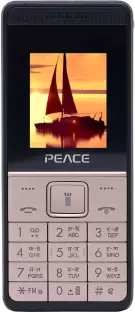
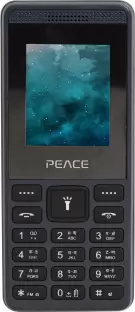


In [378]:
print(df[df['ram'] == 'MBRAM64'].iloc[0]['imgURL'] )
print(df[df['ram'] == 'MBRAM64'].iloc[1]['imgURL'] )
print('These are keypad mobiles😂')

https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/o/a/l/mi4-mi4-peace-original-imagjvqadcvfehrk.jpeg?q=70
https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/m/t/h/mi2-mi2-peace-original-imagpd63qyb3qbeh.jpeg?q=70
These are keypad mobiles😂


In [379]:
df.drop(index=df[df['ram'] == 'MBRAM64'].index,inplace=True)
df.reset_index(inplace=True)

In [380]:
random_values('ram',total=15)

82 : 3
213 : 4
485 : 3
282 : 6
17 : 12
151 : 6
477 : 4
238 : 8
294 : 3
402 : 6
448 : 6
399 : 6
86 : 4
238 : 8
250 : 4


In [381]:
not_converted_values = []
pattern = r'^MBRAM.*'
for value in df['ram']:
    if re.match(pattern, value):
        not_converted_values.append(value)

not_converted_values

[]

In [382]:
random_values('storage_ram')

39 : Internal Storage32 GBRAM3 GBExpandable Storage256 GBSupported Memory Card TypemicroSDMemory Card Slot TypeDedicated Slot
147 : Internal Storage64 GBRAM4 GBExpandable Storage128 GBSupported Memory Card TypemicroSDMemory Card Slot TypeHybrid SlotCall Log MemoryYes
36 : Internal Storage128 GBRAM8 GBExpandable Storage1 TBSupported Memory Card TypemicroSDMemory Card Slot TypeHybrid SlotCall Log MemoryYes
65 : Internal Storage64 GBRAM4 GBExpandable Storage512 GBSupported Memory Card TypemicroSDMemory Card Slot TypeDedicated Slot
107 : Internal Storage256 GBRAM8 GB
362 : Internal Storage64 GBRAM4 GBMemory Card Slot TypeDedicated Slot


## Operating System and Processor
### I will extract
1) OS
2) Processor
3) speed

### Android Version

In [383]:
random_values('os_processor',9)

480 : Operating SystemAndroid 11Processor TypeMediatek Dimensity 920Processor CoreOcta CorePrimary Clock Speed2.5 GHzSecondary Clock Speed2 GHzOperating Frequency5G NR: N1, N3, N5, N8, N28, N40, N77, N78, 4G FDD: B1, B3, B5, B8, 4G TDD: B40, B41, 3G WCDMA: B1, B2, B5, B8, 2G GSM: B2, B3, B5, B8
302 : Operating SystemAndroid 11Processor TypeMediatek Dimensity 700Processor CoreOcta CorePrimary Clock Speed2.2 GHzOperating Frequency5G SA: N1, N3, N40, N77, N78, 5G NSA: N78, 4G FDD-LTE: B1/B3/B5/B8, 4G TDD-LTE: B40/B41, 3G WCDMA: B1/B2/B5/B8, 2G GSM: B2/B3/B5/B8
291 : Operating SystemAndroid 12Primary Clock Speed2.2 GHz
325 : Operating SystemAndroid 12Processor CoreOcta CorePrimary Clock Speed2 GHz
225 : Operating SystemAndroid 11Processor TypeQualcomm Snapdragon 680Processor CoreOcta CorePrimary Clock Speed2.4 GHzTertiary Clock Speed2.4 GHzOperating Frequency2G GSM: B2/B3/B5/B8, 3G WCDMA: B1/B5/B8, 4G LTE: B1/B3/B5/8/B40/B41
129 : Operating SystemAndroid Pie 9.0Processor TypeQualcomm Snapd

In [384]:
text = '446 : Operating SystemAndroid Marshmallow 6Processor TypeSnapdragon 820 KryoProcessor CoreQuad CorePrimary Clock Speed1.8 GHzOperating FrequencyGSM - 850, 900, 1800, 1900; WCDMA - 850, 900, 1900, 2100; 4G LTE (TD-SCDMA) - 1900, 2000, LTE (TD) - B38 / B39 / B40 / B41, LTE (FDD) - B1 / B3 / B5 / B7'

In [385]:
pattern = r'.*Processor'
re.findall(pattern,text)[0]

'446 : Operating SystemAndroid Marshmallow 6Processor TypeSnapdragon 820 KryoProcessor'

In [386]:
def extract_processor(text):
    pattern = r'.*Processor'
    match = re.findall(pattern, text)
    if match:
        return match[0]
    else:
        return text


In [387]:
extract_processor('39 : Operating SystemAndroid 11Processor CoreOcta CorePrimary Clock Speed2.4 GHz')

'39 : Operating SystemAndroid 11Processor'

In [388]:
df['processors'] = df['os_processor'].apply(func=extract_processor)

In [389]:
df

,index,name,ratings,price,imgURL,storage_ram,os_processor,camera,display,network,battery,storage,ram,processors
0,0,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,"₹8,990",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,Primary Camera13MP Rear Camera,Display Size16.59 cm (6.53 inch)Resolution1600...,"Network Type4G VOLTE, 4GSupported Networks4G V...",5000,32,3,Operating SystemAndroid Q 10Processor
1,1,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,"₹21,430",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera64MP ...,Display Size16.64 cm (6.55 inch)Resolution1080...,"Network Type5G, 4G VOLTESupported Networks5G, ...",4250,128,6,Operating SystemAndroid 11Processor TypeQualco...
2,2,"Xiaomi 11Lite NE (Diamond Dazzle, 128 GB)",4.2,"₹20,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera64MP ...,Display Size16.64 cm (6.55 inch)Resolution1080...,"Network Type5G, 4G VOLTESupported Networks5G, ...",4250,128,6,Operating SystemAndroid 11Processor TypeQualco...
3,3,"Xiaomi 11Lite NE (Tuscany Coral, 128 GB)",4.2,"₹20,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera64MP ...,Display Size16.64 cm (6.55 inch)Resolution1080...,"Network Type5G, 4G VOLTESupported Networks5G, ...",4250,128,6,Operating SystemAndroid 11Processor TypeQualco...
4,4,"Mi 11 Lite (Jazz Blue, 128 GB)",4.2,"₹17,499",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM8 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera64MP ...,Display Size16.64 cm (6.55 inch)Resolution2400...,"Network Type4G VOLTE, 4G, 3G, 2GSupported Netw...",4250,128,8,Operating SystemAndroid 11Processor TypeQualco...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,512,"Mi A3 (Not just Blue, 64 GB)",4.2,"₹14,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid Pie 9Processor TypeQua...,Primary Camera AvailableYesPrimary Camera48MP ...,Display Size15.46 cm (6.088 inch)Resolution156...,"Network Type4G VOLTE, 4G, 2G, 3GSupported Netw...",4030,64,4,Operating SystemAndroid Pie 9Processor TypeQua...
511,513,"Mi 10T Pro (Lunar Silver, 128 GB)",4.3,"₹26,899",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM8 GBCall Log MemoryYes,Operating SystemAndroid 10Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera108MP...,Display Size16.94 cm (6.67 inch)Resolution2400...,"Network Type5G, 4G VOLTE, 4G, 3G, 2GSupported ...",5000,128,8,Operating SystemAndroid 10Processor TypeQualco...
512,514,"Redmi Y1 (Gold, 32 GB)",4.5,"₹8,999",https://rukminim2.flixcart.com/image/312/312/j...,Internal Storage32 GBRAM3 GBExpandable Storage...,Operating SystemAndroid Nougat 7.1.2Processor ...,Primary Camera AvailableYesPrimary Camera13MP ...,Display Size13.97 cm (5.5 inch)Resolution1280 ...,"Network Type3G, 4G, 2GSupported NetworksGSM, W...",3080,32,3,Operating SystemAndroid Nougat 7.1.2Processor ...
513,515,"Redmi Note 7 Pro (Neptune Blue, 128 GB)",4.3,"₹17,999",https://rukminim2.flixcart.com/image/312/312/j...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid Pie 9.0Processor TypeQ...,Primary Camera AvailableYesPrimary Camera48MP ...,Display Size16.0 cm (6.3 inch)Resolution2340 x...,"Network Type3G, 4G VOLTE, 2GSupported Networks...",4000,128,6,Operating SystemAndroid Pie 9.0Processor TypeQ...


In [390]:
random_values('processors',10)

378 : Operating SystemAndroid 12Processor TypeQualcomm Snapdragon 732GProcessor
319 : Operating SystemAndroid Android 11Processor TypeHelio G88Processor
412 : Operating SystemAndroid 11Processor TypeQualcomm Snapdragon 732GProcessor
508 : Operating SystemAndroid Pie 9.0Processor
150 : Operating SystemAndroid KitKat 4.4.4Processor TypeQualcomm MSM8274AC Snapdragon 801 Krait 400Processor
306 : Operating SystemAndroid Q Android 11Processor
253 : Operating SystemAndroid Q 11Processor
43 : Operating SystemAndroid Pie 10Processor TypeQualcomm® Snapdragon™ 720GProcessor
357 : Operating SystemAndroid Android 13Processor
239 : Operating SystemAndroid 13Processor TypeSnapdragon 685Processor


In [391]:
len('12Processor') , len('7.1.2Processor')

(11, 14)

In [392]:
len('8.1Processor')

12

In [393]:
ls = df['processors'][0].split()
ls

['Operating', 'SystemAndroid', 'Q', '10Processor']

In [394]:
pattern = '.*Processor$'
re.match(pattern=pattern,string=ls[2])

In [395]:
ls
' '.join(ls)

'Operating SystemAndroid Q 10Processor'

In [396]:
# if ls[1] =='SystemAndroid'and :

In [397]:
pattern = 'Operating SystemAndroid (\d+(?:\.\d+)?)Processor'

In [398]:
df['processors'][34].split()

['Operating', 'SystemAndroid', 'Q', '11Processor']

In [399]:
ls = df['processors'][34].split()
ls

['Operating', 'SystemAndroid', 'Q', '11Processor']

In [400]:
pattern = r'\d+(?:\.\d+)+'
re.findall(pattern,' '.join(ls))

[]

In [401]:
# pattern = r'\d+(?:\.\d+)+'
pattern=r'^\d+[Processor]|\d+[GProcessor]|\d+[.Processor]'
# pattern = r'/^\d*\.?\d*$/'
for i in range(0,10):
    data = df['processors'].iloc[np.random.randint(df.shape[0])]
    print(data)
    words = re.findall(pattern,data)
    print(words)
    print(words)
    print()

Operating SystemAndroid 11Processor
['11P']
['11P']

Operating SystemAndroid Q 11Processor
['11P']
['11P']

Operating SystemAndroid 12Processor TypeSnapdragon 8 Gen 1Processor
['12P', '1P']
['12P', '1P']

Operating SystemAndroid 11Processor TypeQualcomm Snapdragon 888Processor
['11P', '888P']
['11P', '888P']

Operating SystemAndroid Q 10Processor TypeMediaTek Helio G25Processor
['10P', '25P']
['10P', '25P']

Operating SystemAndroid 12 GoProcessor TypeMediatek Helio A22Processor
['22P']
['22P']

Operating SystemAndroid 11Processor TypeQualcomm Snapdragon 888Processor
['11P', '888P']
['11P', '888P']

Operating SystemAndroid 11Processor TypeMediatek Dimensity 920Processor
['11P', '920P']
['11P', '920P']

Operating SystemAndroid MIUI 14, Android 13.0Processor
['13.', '0P']
['13.', '0P']

Operating SystemAndroid Pie 9.0Processor TypeQualcomm Snapdragon 632Processor
['9.', '0P', '632P']
['9.', '0P', '632P']



In [402]:
def android_version(text_):
    pattern=r'^\d+[Processor]|\d+[GProcessor]|\d+[.Processor]'
    found = re.findall(pattern,text_)
    if found:
        return found[0]
    else:
        return np.nan

In [403]:
android_version(df['processors'][343])

'11P'

In [404]:
df['android_version'] = df['processors'].apply(android_version)

In [405]:
random_values('android_version',10)

484 : 9P
54 : 10P
395 : 12.
58 : 11P
238 : 12P
111 : 11P
435 : 6.
136 : 9.
257 : 11P
323 : 12P


In [406]:
# def replace(text):
#     if text

In [407]:
df['android_version'][109].replace('.','')

'7'

In [408]:
df['android_version']=df['android_version'].replace('P','')

In [409]:
for Index,i in enumerate(df['android_version']):
    # print(i)
    i = str(i).replace('P','')
    df['android_version'][Index] = i

In [410]:
for Index,i in enumerate(df['android_version']):
    # print(i)
    i = str(i).replace('.','')
    df['android_version'][Index] = i

In [411]:
random_values('android_version')

341 : 12
151 : 10
382 : 11
171 : 8
286 : 11
178 : 7


## Processor

In [412]:
random_values('processors')

147 : Operating SystemAndroid Marshmallow 6.0.1Processor TypeQualcomm Snapdragon 625 64-bit Octa Core 2GHzProcessor
188 : Operating SystemAndroid Nougat 7.1.2Processor TypeQualcomm Snapdragon 636Processor
52 : Operating SystemAndroid Nougat 7.1.2Processor TypeQualcomm Snapdragon 636Processor
313 : Operating SystemAndroidProcessor
364 : Operating SystemAndroid Android 13Processor
446 : Operating SystemAndroid Nougat 7.1.2Processor TypeQualcomm Snapdragon 636Processor


In [413]:
pattern=r'Gen'
index_gens = []
for i in range(0,len(df['processors'])):
    data = df['processors'][i]
    word = re.search(pattern,data)
    if word != None:
        index_gens.append(i)

In [414]:
index_gens

[14, 16, 17, 47, 64, 206, 207, 209, 212, 218, 222, 348, 354, 355, 425]

In [415]:
df['processors'].iloc[index_gens] # I am not able to see the values

14     Operating SystemAndroid 12Processor TypeSnapdr...
16     Operating SystemAndroid 12Processor TypeSnapdr...
17     Operating SystemAndroid 12Processor TypeSnapdr...
47     Operating SystemAndroid 12Processor TypeSnapdr...
64     Operating SystemAndroid 12Processor TypeSnapdr...
206    Operating SystemAndroid 12Processor TypeQualco...
207    Operating SystemAndroid 12Processor TypeQualco...
209    Operating SystemAndroid 12Processor TypeQualco...
212    Operating SystemAndroid 12Processor TypeQualco...
218    Operating SystemAndroid 12Processor TypeQualco...
222    Operating SystemAndroid 12Processor TypeQualco...
348    Operating SystemAndroid 12Processor TypeQualco...
354    Operating SystemAndroid 12Processor TypeQualco...
355    Operating SystemAndroid 12Processor TypeQualco...
425    Operating SystemAndroid 12Processor TypeSnapdr...
Name: processors, dtype: object

In [416]:
df['processors'].iloc[14]

'Operating SystemAndroid 12Processor TypeSnapdragon 8 Gen 1Processor'

In [417]:
for i in index_gens:
    gen_word = df['processors'].iloc[i]
    print(gen_word)

Operating SystemAndroid 12Processor TypeSnapdragon 8 Gen 1Processor
Operating SystemAndroid 12Processor TypeSnapdragon 8 Gen 1Processor
Operating SystemAndroid 12Processor TypeSnapdragon 8 Gen 1Processor
Operating SystemAndroid 12Processor TypeSnapdragon 8 Gen 1Processor
Operating SystemAndroid 12Processor TypeSnapdragon 8 Gen 1Processor
Operating SystemAndroid 12Processor TypeQualcomm Snapdragon 4 Gen 1Processor
Operating SystemAndroid 12Processor TypeQualcomm Snapdragon 4 Gen 1Processor
Operating SystemAndroid 12Processor TypeQualcomm Snapdragon 4 Gen 1Processor
Operating SystemAndroid 12Processor TypeQualcomm Snapdragon 4 Gen 1Processor
Operating SystemAndroid 12Processor TypeQualcomm Snapdragon 4 Gen 1Processor
Operating SystemAndroid 12Processor TypeQualcomm Snapdragon 4 Gen 1Processor
Operating SystemAndroid 12Processor TypeQualcomm Snapdragon 4 Gen 1Processor
Operating SystemAndroid 12Processor TypeQualcomm Snapdragon 4 Gen 1Processor
Operating SystemAndroid 12Processor TypeQual

In [420]:
# df = df.drop(['index','level_0'],axis=1)

In [421]:
df.iloc[index_gens]

,index,name,ratings,price,imgURL,storage_ram,os_processor,camera,display,network,battery,storage,ram,processors,android_version
14,14,"Xiaomi 12 Pro 5G (Opera Mauve, 256 GB)",4.2,"₹44,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage256 GBRAM12 GBCall Log MemoryYes,Operating SystemAndroid 12Processor TypeSnapdr...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size17.09 cm (6.73 inch)Resolution2400...,"Network Type5G, 4G VOLTE, 4G, 3G, 2GSupported ...",4600,256,12,Operating SystemAndroid 12Processor TypeSnapdr...,12
16,16,"Xiaomi 12 Pro 5G (Noir Black, 256 GB)",4.1,"₹41,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage256 GBRAM8 GBCall Log MemoryYes,Operating SystemAndroid 12Processor TypeSnapdr...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size17.09 cm (6.73 inch)Resolution2400...,"Network Type5G, 4G VOLTE, 4G, 3G, 2GSupported ...",4600,256,8,Operating SystemAndroid 12Processor TypeSnapdr...,12
17,17,"Xiaomi 12 Pro 5G (Noir Black, 256 GB)",4.2,"₹44,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage256 GBRAM12 GBCall Log MemoryYes,Operating SystemAndroid 12Processor TypeSnapdr...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size17.09 cm (6.73 inch)Resolution2400...,"Network Type5G, 4G VOLTE, 4G, 3G, 2GSupported ...",4600,256,12,Operating SystemAndroid 12Processor TypeSnapdr...,12
47,47,"Xiaomi 12 Pro 5G (Opera Mauve, 256 GB)",4.1,"₹41,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage256 GBRAM8 GBCall Log MemoryYes,Operating SystemAndroid 12Processor TypeSnapdr...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size17.09 cm (6.73 inch)Resolution2400...,"Network Type5G, 4G VOLTE, 4G, 3G, 2GSupported ...",4600,256,8,Operating SystemAndroid 12Processor TypeSnapdr...,12
64,64,"Xiaomi 12 Pro 5G (Couture Blue, 256 GB)",4.2,"₹44,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage256 GBRAM12 GBCall Log MemoryYes,Operating SystemAndroid 12Processor TypeSnapdr...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size17.09 cm (6.73 inch)Resolution2400...,"Network Type5G, 4G VOLTE, 4G, 3G, 2GSupported ...",4600,256,12,Operating SystemAndroid 12Processor TypeSnapdr...,12
206,206,"REDMI Note 12 5G (Mystique Blue, 128 GB)",4.1,"₹18,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera48MP ...,Display Size16.94 cm (6.67 inch)Resolution2400...,"Network Type5G, 4G VOLTE, 4G, 3G, 2GSupported ...",5000,128,6,Operating SystemAndroid 12Processor TypeQualco...,12
207,207,"REDMI Note 12 5G (Matte Black, 128 GB)",4.0,"₹16,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera48MP ...,Display Size16.94 cm (6.67 inch)Resolution2400...,"Network Type5G, 4G VOLTE, 4G, 3G, 2GSupported ...",5000,128,4,Operating SystemAndroid 12Processor TypeQualco...,12
209,209,"REDMI Note 12 5G (Matte Black, 128 GB)",4.1,"₹18,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera48MP ...,Display Size16.94 cm (6.67 inch)Resolution2400...,"Network Type5G, 4G VOLTE, 4G, 3G, 2GSupported ...",5000,128,6,Operating SystemAndroid 12Processor TypeQualco...,12
212,212,"REDMI Note 12 5G (Frosted Green, 128 GB)",4.1,"₹18,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera48MP ...,Display Size16.94 cm (6.67 inch)Resolution2400...,"Network Type5G, 4G VOLTE, 4G, 3G, 2GSupported ...",5000,128,6,Operating SystemAndroid 12Processor TypeQualco...,12
218,218,"REDMI Note 12

😍Wow!
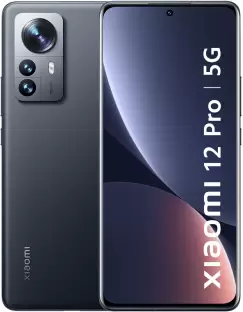

In [422]:
df['price'].iloc[[12]]

12    ₹12,840
Name: price, dtype: object

In [423]:
df['imgURL'].iloc[12]

'https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/e/y/b/-original-imageftfzx8gfkys.jpeg?q=70'

In [424]:
df['processors']

0                  Operating SystemAndroid Q 10Processor
1      Operating SystemAndroid 11Processor TypeQualco...
2      Operating SystemAndroid 11Processor TypeQualco...
3      Operating SystemAndroid 11Processor TypeQualco...
4      Operating SystemAndroid 11Processor TypeQualco...
                             ...                        
510    Operating SystemAndroid Pie 9Processor TypeQua...
511    Operating SystemAndroid 10Processor TypeQualco...
512    Operating SystemAndroid Nougat 7.1.2Processor ...
513    Operating SystemAndroid Pie 9.0Processor TypeQ...
514    Operating SystemAndroid Q 11Processor TypeQual...
Name: processors, Length: 515, dtype: object

In [425]:

for i in index_gens:
    gen_word = df['processors'].iloc[i]
    print(gen_word)
    patt = r'\d'
    match = re.findall(patt,gen_word)
    print(match[2]) # this is good.

Operating SystemAndroid 12Processor TypeSnapdragon 8 Gen 1Processor
8
Operating SystemAndroid 12Processor TypeSnapdragon 8 Gen 1Processor
8
Operating SystemAndroid 12Processor TypeSnapdragon 8 Gen 1Processor
8
Operating SystemAndroid 12Processor TypeSnapdragon 8 Gen 1Processor
8
Operating SystemAndroid 12Processor TypeSnapdragon 8 Gen 1Processor
8
Operating SystemAndroid 12Processor TypeQualcomm Snapdragon 4 Gen 1Processor
4
Operating SystemAndroid 12Processor TypeQualcomm Snapdragon 4 Gen 1Processor
4
Operating SystemAndroid 12Processor TypeQualcomm Snapdragon 4 Gen 1Processor
4
Operating SystemAndroid 12Processor TypeQualcomm Snapdragon 4 Gen 1Processor
4
Operating SystemAndroid 12Processor TypeQualcomm Snapdragon 4 Gen 1Processor
4
Operating SystemAndroid 12Processor TypeQualcomm Snapdragon 4 Gen 1Processor
4
Operating SystemAndroid 12Processor TypeQualcomm Snapdragon 4 Gen 1Processor
4
Operating SystemAndroid 12Processor TypeQualcomm Snapdragon 4 Gen 1Processor
4
Operating SystemAn

In [426]:
for i in df['processors']:
    print(i)

Operating SystemAndroid Q 10Processor
Operating SystemAndroid 11Processor TypeQualcomm Snapdragon 778GProcessor
Operating SystemAndroid 11Processor TypeQualcomm Snapdragon 778GProcessor
Operating SystemAndroid 11Processor TypeQualcomm Snapdragon 778GProcessor
Operating SystemAndroid 11Processor TypeQualcomm Snapdragon 732GProcessor
Operating SystemAndroid 11Processor TypeQualcomm Snapdragon 732GProcessor
Operating SystemAndroid 10Processor TypeQualcomm Snapdragon 865Processor
Operating SystemAndroid Oreo 8.1Processor
Operating SystemAndroid Q 10Processor
Operating SystemAndroid 13Processor
Operating SystemAndroid 11Processor TypeQualcomm Snapdragon 778GProcessor
Operating SystemAndroid Q 10Processor
Operating SystemAndroid 13Processor
Operating SystemAndroid 11Processor TypeQualcomm Snapdragon 870Processor
Operating SystemAndroid 12Processor TypeSnapdragon 8 Gen 1Processor
Operating SystemAndroid 11Processor TypeQualcomm Snapdragon 732GProcessor
Operating SystemAndroid 12Processor Type

In [427]:
def get_processors(txt):
    pattern=r'Gen'
    found = re.search(pattern,txt)
    if found != None:
        pattern_ = r'\d'
        match = re.findall(pattern_,txt)
        return match[2]
    else:
        return txt


In [428]:
get_processors(df['processors'][14])

'8'

In [429]:
df['processor_type'] =df['processors'].apply(get_processors)

In [430]:
random_values('processor_type')

42 : Operating SystemAndroid Oreo 8.1Processor TypeQualcomm Snapdragon 636Processor
337 : Operating SystemAndroid Q 11Processor
484 : Operating SystemAndroid Pie 9Processor TypeQualcomm Snapdragon 439Processor
93 : Operating SystemAndroid Oreo 8.1Processor Type2.0 GHz Mediatek P22 OctacoreProcessor
318 : Operating SystemAndroid Q 11Processor
514 : Operating SystemAndroid Q 11Processor TypeQualcomm® Snapdragon™ 750GProcessor


In [431]:
df

,index,name,ratings,price,imgURL,storage_ram,os_processor,camera,display,network,battery,storage,ram,processors,android_version,processor_type
0,0,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,"₹8,990",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,Primary Camera13MP Rear Camera,Display Size16.59 cm (6.53 inch)Resolution1600...,"Network Type4G VOLTE, 4GSupported Networks4G V...",5000,32,3,Operating SystemAndroid Q 10Processor,10,Operating SystemAndroid Q 10Processor
1,1,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,"₹21,430",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera64MP ...,Display Size16.64 cm (6.55 inch)Resolution1080...,"Network Type5G, 4G VOLTESupported Networks5G, ...",4250,128,6,Operating SystemAndroid 11Processor TypeQualco...,11,Operating SystemAndroid 11Processor TypeQualco...
2,2,"Xiaomi 11Lite NE (Diamond Dazzle, 128 GB)",4.2,"₹20,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera64MP ...,Display Size16.64 cm (6.55 inch)Resolution1080...,"Network Type5G, 4G VOLTESupported Networks5G, ...",4250,128,6,Operating SystemAndroid 11Processor TypeQualco...,11,Operating SystemAndroid 11Processor TypeQualco...
3,3,"Xiaomi 11Lite NE (Tuscany Coral, 128 GB)",4.2,"₹20,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera64MP ...,Display Size16.64 cm (6.55 inch)Resolution1080...,"Network Type5G, 4G VOLTESupported Networks5G, ...",4250,128,6,Operating SystemAndroid 11Processor TypeQualco...,11,Operating SystemAndroid 11Processor TypeQualco...
4,4,"Mi 11 Lite (Jazz Blue, 128 GB)",4.2,"₹17,499",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM8 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera64MP ...,Display Size16.64 cm (6.55 inch)Resolution2400...,"Network Type4G VOLTE, 4G, 3G, 2GSupported Netw...",4250,128,8,Operating SystemAndroid 11Processor TypeQualco...,11,Operating SystemAndroid 11Processor TypeQualco...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,512,"Mi A3 (Not just Blue, 64 GB)",4.2,"₹14,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid Pie 9Processor TypeQua...,Primary Camera AvailableYesPrimary Camera48MP ...,Display Size15.46 cm (6.088 inch)Resolution156...,"Network Type4G VOLTE, 4G, 2G, 3GSupported Netw...",4030,64,4,Operating SystemAndroid Pie 9Processor TypeQua...,9,Operating SystemAndroid Pie 9Processor TypeQua...
511,513,"Mi 10T Pro (Lunar Silver, 128 GB)",4.3,"₹26,899",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM8 GBCall Log MemoryYes,Operating SystemAndroid 10Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera108MP...,Display Size16.94 cm (6.67 inch)Resolution2400...,"Network Type5G, 4G VOLTE, 4G, 3G, 2GSupported ...",5000,128,8,Operating SystemAndroid 10Processor TypeQualco...,10,Operating SystemAndroid 10Processor TypeQualco...
512,514,"Redmi Y1 (Gold, 32 GB)",4.5,"₹8,999",https://rukminim2.flixcart.com/image/312/312/j...,Internal Storage32 GBRAM3 GBExpandable Storage...,Operating SystemAndroid Nougat 7.1.2Processor ...,Primary Camera AvailableYesPrimary Camera13MP ...,Display Size13.97 cm (5.5 inch)Resolution1280 ...,"Network Type3G, 4G, 2GSupported NetworksGSM, W...",3080,32,3,Operating SystemAndroid Nougat 7.1.2Processor ...,7,Operating SystemAndroid Nougat 7.1.2Processor ...
513,515,"Redmi Note 7 Pro (Neptune Blue, 128 GB)",4.3,"₹17,999",ht

### Processor

In [432]:
patt = r'^Type+'
re.findall(patt,df['processors'][4])

[]

In [433]:
df

,index,name,ratings,price,imgURL,storage_ram,os_processor,camera,display,network,battery,storage,ram,processors,android_version,processor_type
0,0,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,"₹8,990",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,Primary Camera13MP Rear Camera,Display Size16.59 cm (6.53 inch)Resolution1600...,"Network Type4G VOLTE, 4GSupported Networks4G V...",5000,32,3,Operating SystemAndroid Q 10Processor,10,Operating SystemAndroid Q 10Processor
1,1,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,"₹21,430",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera64MP ...,Display Size16.64 cm (6.55 inch)Resolution1080...,"Network Type5G, 4G VOLTESupported Networks5G, ...",4250,128,6,Operating SystemAndroid 11Processor TypeQualco...,11,Operating SystemAndroid 11Processor TypeQualco...
2,2,"Xiaomi 11Lite NE (Diamond Dazzle, 128 GB)",4.2,"₹20,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera64MP ...,Display Size16.64 cm (6.55 inch)Resolution1080...,"Network Type5G, 4G VOLTESupported Networks5G, ...",4250,128,6,Operating SystemAndroid 11Processor TypeQualco...,11,Operating SystemAndroid 11Processor TypeQualco...
3,3,"Xiaomi 11Lite NE (Tuscany Coral, 128 GB)",4.2,"₹20,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera64MP ...,Display Size16.64 cm (6.55 inch)Resolution1080...,"Network Type5G, 4G VOLTESupported Networks5G, ...",4250,128,6,Operating SystemAndroid 11Processor TypeQualco...,11,Operating SystemAndroid 11Processor TypeQualco...
4,4,"Mi 11 Lite (Jazz Blue, 128 GB)",4.2,"₹17,499",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM8 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera64MP ...,Display Size16.64 cm (6.55 inch)Resolution2400...,"Network Type4G VOLTE, 4G, 3G, 2GSupported Netw...",4250,128,8,Operating SystemAndroid 11Processor TypeQualco...,11,Operating SystemAndroid 11Processor TypeQualco...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,512,"Mi A3 (Not just Blue, 64 GB)",4.2,"₹14,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid Pie 9Processor TypeQua...,Primary Camera AvailableYesPrimary Camera48MP ...,Display Size15.46 cm (6.088 inch)Resolution156...,"Network Type4G VOLTE, 4G, 2G, 3GSupported Netw...",4030,64,4,Operating SystemAndroid Pie 9Processor TypeQua...,9,Operating SystemAndroid Pie 9Processor TypeQua...
511,513,"Mi 10T Pro (Lunar Silver, 128 GB)",4.3,"₹26,899",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM8 GBCall Log MemoryYes,Operating SystemAndroid 10Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera108MP...,Display Size16.94 cm (6.67 inch)Resolution2400...,"Network Type5G, 4G VOLTE, 4G, 3G, 2GSupported ...",5000,128,8,Operating SystemAndroid 10Processor TypeQualco...,10,Operating SystemAndroid 10Processor TypeQualco...
512,514,"Redmi Y1 (Gold, 32 GB)",4.5,"₹8,999",https://rukminim2.flixcart.com/image/312/312/j...,Internal Storage32 GBRAM3 GBExpandable Storage...,Operating SystemAndroid Nougat 7.1.2Processor ...,Primary Camera AvailableYesPrimary Camera13MP ...,Display Size13.97 cm (5.5 inch)Resolution1280 ...,"Network Type3G, 4G, 2GSupported NetworksGSM, W...",3080,32,3,Operating SystemAndroid Nougat 7.1.2Processor ...,7,Operating SystemAndroid Nougat 7.1.2Processor ...
513,515,"Redmi Note 7 Pro (Neptune Blue, 128 GB)",4.3,"₹17,999",ht

In [438]:
pattern=r'(?<=Type).*'
for i in range(0,10):
    data = df['processors'].iloc[np.random.randint(df.shape[0])]
    print(data)
    words = re.findall(pattern,data)
    print(words)

Operating SystemAndroid Q 11Processor
[]
Operating SystemAndroid Marshmallow 6.0.1Processor TypeQualcomm Snapdragon 650 64-bitProcessor
['Qualcomm Snapdragon 650 64-bitProcessor']
Operating SystemAndroid Q 11Processor TypeOcta CoreProcessor
['Octa CoreProcessor']
Operating SystemAndroid 12Processor TypeQualcomm Snapdragon 4 Gen 1Processor
['Qualcomm Snapdragon 4 Gen 1Processor']
Operating SystemAndroid 10Processor TypeQualcomm Snapdragon 865Processor
['Qualcomm Snapdragon 865Processor']
Operating SystemAndroid 11Processor TypeMediatek Helio G95Processor
['Mediatek Helio G95Processor']
Operating SystemAndroid Oreo 8.1Processor Type2.0 GHz Mediatek P22 OctacoreProcessor
['2.0 GHz Mediatek P22 OctacoreProcessor']
Operating SystemAndroid Oreo 8.1Processor TypeQualcomm Snapdragon 636Processor
['Qualcomm Snapdragon 636Processor']
Operating SystemAndroid Nougat 7.1.1Processor TypeQualcomm Snapdragon 625 Octa Core 2 GhzProcessor
['Qualcomm Snapdragon 625 Octa Core 2 GhzProcessor']
Operating Sy

In [439]:
def processor(text):
    pattern=r'(?<=Type).*'
    search = re.search(pattern,text)
    if search != None:
        return ' '.join(re.findall(pattern,text))
    else:
        return 'not montioned'

In [440]:
print(processor(df['processors'][4]))
print(processor(df['processors'][0]))

Qualcomm Snapdragon 732GProcessor
not montioned


In [441]:
df['processors'] = df['processors'].apply(processor)

# Removing Columns

In [442]:
df = df = df.drop(columns=['os_processor','storage_ram','processor_type'])

In [443]:
df.rename({'processors':'processor'},axis=1,inplace=True)

In [444]:
df[df['processor'] == 'not montioned']

,index,name,ratings,price,imgURL,camera,display,network,battery,storage,ram,processor,android_version
0,0,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,"₹8,990",https://rukminim2.flixcart.com/image/312/312/x...,Primary Camera13MP Rear Camera,Display Size16.59 cm (6.53 inch)Resolution1600...,"Network Type4G VOLTE, 4GSupported Networks4G V...",5000,32,3,not montioned,10
7,7,"Redmi 6A (Black, 16 GB)",4.3,"₹6,500",https://rukminim2.flixcart.com/image/312/312/j...,Primary Camera AvailableYesPrimary Camera13MP ...,Display Size13.84 cm (5.45 inch)Resolution720 ...,"Network Type3G, 4G VOLTE, 2GSupported Networks...",3000,16,2,not montioned,8
8,8,"Redmi 9A Sport (Carbon Black, 32 GB)",4.1,"₹7,790",https://rukminim2.flixcart.com/image/312/312/x...,Primary Camera13MP Rear Camera,Display Size16.59 cm (6.53 inch)Resolution720 ...,"Network Type4G VOLTE, 4GSupported Networks4G V...",5000,32,2,not montioned,10
9,9,"REDMI 10 Power (Sporty Orange, 128 GB)",4.2,"₹18,996",https://rukminim2.flixcart.com/image/312/312/x...,Primary Camera50MP Rear CameraDual Camera Lens...,Display Size17.02 cm (6.7 inch)Resolution2400 ...,Network Type4G VOLTESupported Networks4G LTE,6000,128,8,not montioned,13
11,11,"Redmi 9A Sport (Coral Green, 32 GB)",4.1,"₹7,290",https://rukminim2.flixcart.com/image/312/312/x...,Primary Camera13MP Rear Camera,Display Size16.59 cm (6.53 inch)Resolution720 ...,"Network Type4G VOLTE, 4GSupported Networks4G LTE",5000,32,2,not montioned,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,484,"Mi 11x Pro 5G (Lunar White, 256 GB)",4.0,"₹34,990",https://rukminim2.flixcart.com/image/312/312/k...,Primary Camera108MP Rear CameraDual Camera Len...,Display Size16.94 cm (6.67 inch)Resolution2400...,Network Type5GSupported Networks5G,4520,256,8,not montioned,11
491,493,"Redmi Note 11 PRO Plus 5G (Mirage Blue, 256 GB)",4.2,"₹23,999",https://rukminim2.flixcart.com/image/312/312/x...,Primary Camera108MP Rear CameraDual Camera Len...,Display Size16.94 cm (6.67 inch)Resolution2400...,"Network Type5GSupported Networks5G, GSM, 4G LTE",5000,256,8,not montioned,11
503,505,"Redmi Note 8 (Moonlight White, 32 GB)",4.4,"₹11,990",https://rukminim2.flixcart.com/image/312/312/k...,Primary Camera AvailableYesPrimary Camera48MP ...,Display Size16.0 cm (6.3 inch)Resolution2280 x...,Network Type4G VOLTESupported Networks4G LTEBl...,4000,32,3,not montioned,9
508,510,"Redmi 7 (Lunar Red, 32 GB)",4.3,"₹8,998",https://rukminim2.flixcart.com/image/312/312/k...,Primary Camera12MP Rear CameraDual Camera Lens...,Display Size15.9 cm (6.26 inch)Resolution720 x...,"Network Type3G, 4G VOLTE, 2GSupported Networks...",4000,32,2,not montioned,9


## Price

In [445]:
df['price'] = df['price'].replace('₹','')

In [446]:
df['price'][32].replace('₹','')

'23,990'

In [447]:
for Index,i in enumerate(df['price']):
    i = str(i).replace('₹','')
    i = str(i).replace(',','')
    df['price'][Index] = i

In [448]:
random_values('price')

27 : 8399
159 : 10499
306 : 13999
243 : 32999
152 : 14999
469 : 12331


In [449]:
df

,index,name,ratings,price,imgURL,camera,display,network,battery,storage,ram,processor,android_version
0,0,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,8990,https://rukminim2.flixcart.com/image/312/312/x...,Primary Camera13MP Rear Camera,Display Size16.59 cm (6.53 inch)Resolution1600...,"Network Type4G VOLTE, 4GSupported Networks4G V...",5000,32,3,not montioned,10
1,1,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,21430,https://rukminim2.flixcart.com/image/312/312/x...,Primary Camera AvailableYesPrimary Camera64MP ...,Display Size16.64 cm (6.55 inch)Resolution1080...,"Network Type5G, 4G VOLTESupported Networks5G, ...",4250,128,6,Qualcomm Snapdragon 778GProcessor,11
2,2,"Xiaomi 11Lite NE (Diamond Dazzle, 128 GB)",4.2,20999,https://rukminim2.flixcart.com/image/312/312/x...,Primary Camera AvailableYesPrimary Camera64MP ...,Display Size16.64 cm (6.55 inch)Resolution1080...,"Network Type5G, 4G VOLTESupported Networks5G, ...",4250,128,6,Qualcomm Snapdragon 778GProcessor,11
3,3,"Xiaomi 11Lite NE (Tuscany Coral, 128 GB)",4.2,20999,https://rukminim2.flixcart.com/image/312/312/x...,Primary Camera AvailableYesPrimary Camera64MP ...,Display Size16.64 cm (6.55 inch)Resolution1080...,"Network Type5G, 4G VOLTESupported Networks5G, ...",4250,128,6,Qualcomm Snapdragon 778GProcessor,11
4,4,"Mi 11 Lite (Jazz Blue, 128 GB)",4.2,17499,https://rukminim2.flixcart.com/image/312/312/k...,Primary Camera AvailableYesPrimary Camera64MP ...,Display Size16.64 cm (6.55 inch)Resolution2400...,"Network Type4G VOLTE, 4G, 3G, 2GSupported Netw...",4250,128,8,Qualcomm Snapdragon 732GProcessor,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,512,"Mi A3 (Not just Blue, 64 GB)",4.2,14999,https://rukminim2.flixcart.com/image/312/312/k...,Primary Camera AvailableYesPrimary Camera48MP ...,Display Size15.46 cm (6.088 inch)Resolution156...,"Network Type4G VOLTE, 4G, 2G, 3GSupported Netw...",4030,64,4,Qualcomm Snapdragon 665Processor,9
511,513,"Mi 10T Pro (Lunar Silver, 128 GB)",4.3,26899,https://rukminim2.flixcart.com/image/312/312/k...,Primary Camera AvailableYesPrimary Camera108MP...,Display Size16.94 cm (6.67 inch)Resolution2400...,"Network Type5G, 4G VOLTE, 4G, 3G, 2GSupported ...",5000,128,8,Qualcomm Snapdragon 865Processor,10
512,514,"Redmi Y1 (Gold, 32 GB)",4.5,8999,https://rukminim2.flixcart.com/image/312/312/j...,Primary Camera AvailableYesPrimary Camera13MP ...,Display Size13.97 cm (5.5 inch)Resolution1280 ...,"Network Type3G, 4G, 2GSupported NetworksGSM, W...",3080,32,3,Qualcomm Snapdragon 435Processor,7
513,515,"Redmi Note 7 Pro (Neptune Blue, 128 GB)",4.3,17999,https://rukminim2.flixcart.com/image/312/312/j...,Primary Camera AvailableYesPrimary Camera48MP ...,Display Size16.0 cm (6.3 inch)Resolution2340 x...,"Network Type3G, 4G VOLTE, 2GSupported Networks...",4000,128,6,Qualcomm Snapdragon 675Processor,9


## Model Name

In [450]:
random_values('name',19)

289 : REDMI Note 10S (Deep Sea Blue, 64 GB)
231 : Redmi Note 11 PRO Plus 5G (Mirage Blue, 128 GB)
295 : REDMI 9 Prime (Sunrise Flare, 64 GB)
460 : Mi 5 (Black, 32 GB)
160 : Redmi 5A (Gold, 32 GB)
316 : REDMI Note 11 (Horizon Blue, 64 GB)
274 : REDMI 10 Prime (Astral White, 128 GB)
486 : Redmi 7 (Comet Blue, 32 GB)
31 : Mi 11X (Celestial Silver, 128 GB)
461 : Mi 11X Pro 5G (Cosmic Black, 256 GB)
442 : Redmi Note 11 PRO Plus 5G (Mirage Blue, 256 GB)
168 : Mi Max 2 (Black, 64 GB)
184 : Redmi Note 5 Pro (Lake Blue, 64 GB)
227 : REDMI Note 12 Pro+ 5G (Obsidian Black, 256 GB)
144 : MI 11X 5G (CELESTIAL SILVER, 128 GB)
232 : Redmi Note 11 PRO Plus 5G (Mirage Blue, 256 GB)
204 : REDMI Note 12 (Sunrise Gold, 64 GB)
209 : REDMI Note 12 5G (Matte Black, 128 GB)
471 : Redmi 10 Prime (Bifrost Blue, 64 GB)


In [451]:
pattern=r'\(.*$'
for i in range(0,10):
    data = df['name'].iloc[np.random.randint(df.shape[0])]
    print(data)
    words = re.sub(pattern,' ',data)
    print(words)
    print()

REDMI Note 10S (Cosmic Purple, 128 GB)
REDMI Note 10S  

Mi 10i (Atlantic Blue, 64 GB)
Mi 10i  

REDMI Note 11 SE (Thunder Purple, 64 GB)
REDMI Note 11 SE  

REDMI Note 10T 5G (Mint Green, 128 GB)
REDMI Note 10T 5G  

REDMI A2+ (Sea Green, 64 GB)
REDMI A2+  

REDMI A2 (Classic Black, 64 GB)
REDMI A2  

REDMI Note 12 Pro+ 5G (Iceberg Blue, 256 GB)
REDMI Note 12 Pro+ 5G  

Redmi Note 7 (Ruby Red, 64 GB)
Redmi Note 7  

Xiaomi 11i 5G (Camo Green, 128 GB)
Xiaomi 11i 5G  

Xiaomi 11i Hypercharge 5G (Stealth Black, 128 GB)
Xiaomi 11i Hypercharge 5G  



In [452]:
def remove_extra_name(text):
    pattern=r'\(.*$'
    return ''.join(re.sub(pattern,'',text))


In [453]:
# df['model_names'] = df['model_names'].apply(remove_extra_name)

In [454]:
random_values('name')

31 : Mi 11X (Celestial Silver, 128 GB)
401 : REDMI Note 8 Pro (Electric Blue, 64 GB)
179 : Redmi Note 7 (Onyx Black, 32 GB)
377 : REDMI Note 10 Pro Max (Vintage Bronze, 128 GB)
416 : Xiaomi 11Lite NE (Diamond Dazzle, 256 GB)
499 : Redmi 7 (Eclipse Black, 32 GB)


In [455]:
df['name'].duplicated().sum()

113

## I will not do this.

## Network

In [456]:
random_values('network')

48 : Network Type3G, 4G VOLTE, 4G, 2GSupported NetworksGSM, WCDMA, 4G VoLTE, 4G LTEInternet Connectivity4G, 3G, Wi-Fi3GYesBluetooth SupportYesBluetooth Version5Wi-FiYesWi-Fi Version802.11a/b/g/n/acMap SupportGoogle MapsGPS SupportYes
200 : Network Type4G VOLTE, 4G, 3G, 2GSupported Networks4G VoLTE, 4G LTE, WCDMA, GSMInternet Connectivity4G, 3G, Wi-Fi, EDGE, GPRSGPRSYesMicro USB PortYesBluetooth SupportYesBluetooth Versionv5.0Wi-FiYesWi-Fi Version802.11/b/g/nWi-Fi HotspotYesMini HDMI PortNoNFCNoUSB TetheringYesUSB ConnectivityYesAudio Jack3.5mmMap SupportGoogle MapsGPS SupportYes
452 : Network Type3G, 4G VOLTE, 2GSupported NetworksGSM, WCDMA, 4G VoLTE, 4G LTEInternet Connectivity4G, 3G, Wi-Fi3GYesBluetooth SupportYesBluetooth Version5.0Wi-FiYesWi-Fi Version802.11 a/b/g/n/ac (2x2 MiMo)USB ConnectivityYesAudio Jack3.5mmMap SupportGoogle MapsGPS SupportYes
167 : Network Type3G, 4G VOLTESupported Networks4G LTEInternet Connectivity4G, 3G, Wi-Fi3GYesPre-installed BrowserAndroidMicro USB Port

In [457]:
# df = df.drop(labels=['index'],axis=1)

In [458]:
df

,index,name,ratings,price,imgURL,camera,display,network,battery,storage,ram,processor,android_version
0,0,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,8990,https://rukminim2.flixcart.com/image/312/312/x...,Primary Camera13MP Rear Camera,Display Size16.59 cm (6.53 inch)Resolution1600...,"Network Type4G VOLTE, 4GSupported Networks4G V...",5000,32,3,not montioned,10
1,1,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,21430,https://rukminim2.flixcart.com/image/312/312/x...,Primary Camera AvailableYesPrimary Camera64MP ...,Display Size16.64 cm (6.55 inch)Resolution1080...,"Network Type5G, 4G VOLTESupported Networks5G, ...",4250,128,6,Qualcomm Snapdragon 778GProcessor,11
2,2,"Xiaomi 11Lite NE (Diamond Dazzle, 128 GB)",4.2,20999,https://rukminim2.flixcart.com/image/312/312/x...,Primary Camera AvailableYesPrimary Camera64MP ...,Display Size16.64 cm (6.55 inch)Resolution1080...,"Network Type5G, 4G VOLTESupported Networks5G, ...",4250,128,6,Qualcomm Snapdragon 778GProcessor,11
3,3,"Xiaomi 11Lite NE (Tuscany Coral, 128 GB)",4.2,20999,https://rukminim2.flixcart.com/image/312/312/x...,Primary Camera AvailableYesPrimary Camera64MP ...,Display Size16.64 cm (6.55 inch)Resolution1080...,"Network Type5G, 4G VOLTESupported Networks5G, ...",4250,128,6,Qualcomm Snapdragon 778GProcessor,11
4,4,"Mi 11 Lite (Jazz Blue, 128 GB)",4.2,17499,https://rukminim2.flixcart.com/image/312/312/k...,Primary Camera AvailableYesPrimary Camera64MP ...,Display Size16.64 cm (6.55 inch)Resolution2400...,"Network Type4G VOLTE, 4G, 3G, 2GSupported Netw...",4250,128,8,Qualcomm Snapdragon 732GProcessor,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,512,"Mi A3 (Not just Blue, 64 GB)",4.2,14999,https://rukminim2.flixcart.com/image/312/312/k...,Primary Camera AvailableYesPrimary Camera48MP ...,Display Size15.46 cm (6.088 inch)Resolution156...,"Network Type4G VOLTE, 4G, 2G, 3GSupported Netw...",4030,64,4,Qualcomm Snapdragon 665Processor,9
511,513,"Mi 10T Pro (Lunar Silver, 128 GB)",4.3,26899,https://rukminim2.flixcart.com/image/312/312/k...,Primary Camera AvailableYesPrimary Camera108MP...,Display Size16.94 cm (6.67 inch)Resolution2400...,"Network Type5G, 4G VOLTE, 4G, 3G, 2GSupported ...",5000,128,8,Qualcomm Snapdragon 865Processor,10
512,514,"Redmi Y1 (Gold, 32 GB)",4.5,8999,https://rukminim2.flixcart.com/image/312/312/j...,Primary Camera AvailableYesPrimary Camera13MP ...,Display Size13.97 cm (5.5 inch)Resolution1280 ...,"Network Type3G, 4G, 2GSupported NetworksGSM, W...",3080,32,3,Qualcomm Snapdragon 435Processor,7
513,515,"Redmi Note 7 Pro (Neptune Blue, 128 GB)",4.3,17999,https://rukminim2.flixcart.com/image/312/312/j...,Primary Camera AvailableYesPrimary Camera48MP ...,Display Size16.0 cm (6.3 inch)Resolution2340 x...,"Network Type3G, 4G VOLTE, 2GSupported Networks...",4000,128,6,Qualcomm Snapdragon 675Processor,9


In [459]:
random_values('processor',10)

323 : Mediatek MT6769Z Helio G85Processor
235 : not montioned
249 : not montioned
280 : not montioned
163 : Qualcomm Snapdragon 425Processor
261 : not montioned
179 : Qualcomm Snapdragon 660 AIEProcessor
69 : Qualcomm Snapdragon 439Processor
141 : Qualcomm Snapdragon 625Processor
269 : Mediatek Helio G95 Octa CoreProcessor


In [460]:
for i in range(0,len(df['processor'])):
    row = df['processor'].iloc[i]
    row = row.split()
    if 'Snapdragon' and 'Gen' and '4' in row:
        print(row)

['Qualcomm', 'Snapdragon', '4', 'Gen', '1Processor']
['Qualcomm', 'Snapdragon', '4', 'Gen', '1Processor']
['Qualcomm', 'Snapdragon', '4', 'Gen', '1Processor']
['Qualcomm', 'Snapdragon', '4', 'Gen', '1Processor']
['Qualcomm', 'Snapdragon', '4', 'Gen', '1Processor']
['Qualcomm', 'Snapdragon', '4', 'Gen', '1Processor']
['Qualcomm', 'Snapdragon', '4', 'Gen', '1Processor']
['Qualcomm', 'Snapdragon', '4', 'Gen', '1Processor']
['Qualcomm', 'Snapdragon', '4', 'Gen', '1Processor']


In [461]:
for i in range(0,len(df['processor'])):
    row = df['processor'].iloc[i]
    row = row.split()
    if 'Snapdragon' and 'Gen' and '8' in row:
        print(row)

['Snapdragon', '8', 'Gen', '1Processor']
['Snapdragon', '8', 'Gen', '1Processor']
['Snapdragon', '8', 'Gen', '1Processor']
['Snapdragon', '8', 'Gen', '1Processor']
['Snapdragon', '8', 'Gen', '1Processor']
['Snapdragon', '8', 'Gen', '1Processor']


In [462]:
for i in range(0,len(df['processor'])):
    row = df['processor'].iloc[i]
    row = row.split()
    if 'Snapdragon' and 'Gen' in row:
        print(row)

['Snapdragon', '8', 'Gen', '1Processor']
['Snapdragon', '8', 'Gen', '1Processor']
['Snapdragon', '8', 'Gen', '1Processor']
['Snapdragon', '8', 'Gen', '1Processor']
['Snapdragon', '8', 'Gen', '1Processor']
['Qualcomm', 'Snapdragon', '4', 'Gen', '1Processor']
['Qualcomm', 'Snapdragon', '4', 'Gen', '1Processor']
['Qualcomm', 'Snapdragon', '4', 'Gen', '1Processor']
['Qualcomm', 'Snapdragon', '4', 'Gen', '1Processor']
['Qualcomm', 'Snapdragon', '4', 'Gen', '1Processor']
['Qualcomm', 'Snapdragon', '4', 'Gen', '1Processor']
['Qualcomm', 'Snapdragon', '4', 'Gen', '1Processor']
['Qualcomm', 'Snapdragon', '4', 'Gen', '1Processor']
['Qualcomm', 'Snapdragon', '4', 'Gen', '1Processor']
['Snapdragon', '8', 'Gen', '1Processor']


In [463]:
for i in range(0,len(df['processor'])):
    row = df['processor'].iloc[i]
    row = row.split()
    if 'Snapdragon' in row:
        print(row)

['Qualcomm', 'Snapdragon', '778GProcessor']
['Qualcomm', 'Snapdragon', '778GProcessor']
['Qualcomm', 'Snapdragon', '778GProcessor']
['Qualcomm', 'Snapdragon', '732GProcessor']
['Qualcomm', 'Snapdragon', '732GProcessor']
['Qualcomm', 'Snapdragon', '865Processor']
['Qualcomm', 'Snapdragon', '778GProcessor']
['Qualcomm', 'Snapdragon', '870Processor']
['Snapdragon', '8', 'Gen', '1Processor']
['Qualcomm', 'Snapdragon', '732GProcessor']
['Snapdragon', '8', 'Gen', '1Processor']
['Snapdragon', '8', 'Gen', '1Processor']
['Qualcomm', 'Snapdragon', '778GProcessor']
['Qualcomm', 'Snapdragon', '778GProcessor']
['Qualcomm', 'Snapdragon', '778GProcessor']
['Qualcomm', 'Snapdragon', '778GProcessor']
['Qualcomm', 'Snapdragon', '865Processor']
['Qualcomm', 'Snapdragon', '870Processor']
['Qualcomm', 'Snapdragon', '870Processor']
['Qualcomm', 'Snapdragon', '870Processor']
['Qualcomm', 'Snapdragon', '439Processor']
['Qualcomm', 'Snapdragon', '625Processor']
['Qualcomm', 'Snapdragon', '636Processor']
['Qual

In [464]:
for i in range(0,len(df['processor'])):
    row = df['processor'].iloc[i]
    row = row.split()
    if 'Mediatek' and 'Dimensity' in row:
        print(row)

['Mediatek', 'Dimensity', '920Processor']
['Mediatek', 'Dimensity', '920Processor']
['Mediatek', 'Dimensity', '920Processor']
['Mediatek', 'Dimensity', '920Processor']
['Dimensity', '8100Processor']
['Mediatek', 'Dimensity', '1080Processor']
['Mediatek', 'Dimensity', '1080Processor']
['Mediatek', 'Dimensity', '1080Processor']
['Mediatek', 'Dimensity', '1080Processor']
['Mediatek', 'Dimensity', '1080Processor']
['Mediatek', 'Dimensity', '1080Processor']
['Mediatek', 'Dimensity', '1080Processor']
['Mediatek', 'Dimensity', '1080Processor']
['Mediatek', 'Dimensity', '1080Processor']
['Mediatek', 'Dimensity', '1080Processor']
['Dimensity', '8100Processor']
['Mediatek', 'Dimensity', '1080Processor']
['Mediatek', 'Dimensity', '1080Processor']
['Mediatek', 'Dimensity', '1080Processor']
['Mediatek', 'Dimensity', '1080Processor']
['Mediatek', 'Dimensity', '700Processor']
['Dimensity', '8100Processor']
['Mediatek', 'Dimensity', '700Processor']
['Mediatek', 'Dimensity', '700Processor']
['Mediatek'

In [465]:
for i in range(0,len(df['processor'])):
    row = df['processor'].iloc[i]
    row = row.split()
    if 'Mediatek' and 'Helio' in row:
        pattern = r'\d+[Processor]'
        string = ' '.join(row)
        # # print(string)
        mathc = re.findall(pattern,string)
        print(row)

['MediaTek', 'Helio', 'G25Processor']
['MediaTek', 'Helio', 'G25Processor']
['Mediatek', 'Helio', 'A22Processor']
['Helio', 'G99Processor']
['Helio', 'G99Processor']
['Mediatek', 'Helio', 'A22Processor']
['Helio', 'G99Processor']
['Mediatek', 'Helio', 'A22Processor']
['Mediatek', 'Helio', 'A22Processor']
['Mediatek', 'Helio', 'A22Processor']
['Mediatek', 'Helio', 'A22Processor']
['Helio', 'G99Processor']
['Helio', 'G99Processor']
['Mediatek', 'Helio', 'G35Processor']
['Helio', 'G99Processor']
['MediaTek', 'Helio', 'G85Processor']
['MediaTek', 'Helio', 'G85Processor']
['MediaTek', 'Helio', 'G80Processor']
['Mediatek', 'Helio', 'G95', 'Octa', 'CoreProcessor']
['Mediatek', 'Helio', 'G95', 'Octa', 'CoreProcessor']
['Helio', 'G88Processor']
['MediaTek', 'Helio', 'G80Processor']
['Mediatek', 'Helio', 'G35Processor']
['MediaTek', 'Helio', 'G85Processor']
['Mediatek', 'Helio', 'G95', 'Octa', 'CoreProcessor']
['Mediatek', 'Helio', 'G95Processor']
['Mediatek', 'Helio', 'G95', 'Octa', 'CoreProces

In [479]:
def processor_extract(text):
    splitted_sentence = text.split()
    if 'Mediatek' and 'Helio' in splitted_sentence:
        pattern = r'\d+[Processor]|\d+'
        string = ' '.join(splitted_sentence)
        match = re.search(pattern,string)
        if match == None:
            return 'Heilo'+str(splitted_sentence[2])
        else:
            find = re.findall(pattern,string)
            return 'Heilo'+''.join(find)


    elif 'Mediatek' and 'Dimensity' in splitted_sentence:
        pattern = r'(\d+)+[Processor]'
        string = ' '.join(splitted_sentence)
        match = re.search(pattern,string)
        if match == None:
            if 'Dimensity' == str(splitted_sentence[1]):
                return 'Dimensity'+str(splitted_sentence[2])
            else:
                return 'Dimensity'+str(splitted_sentence[1])
        
        else:
            find = re.findall(pattern,string)
            return 'Dimensity'+ ''.join(find)

    elif 'Snapdragon' and 'Gen' and '4' in splitted_sentence:
        return 'Gen4'   

    elif 'Snapdragon' and 'Gen' and '8' in splitted_sentence:         
        return 'Gen8'
    
    elif 'Unisoc' in splitted_sentence:
        
        if 'Unisoc' and 'Tiger' in splitted_sentence:
            pattern = r'[T]\d[Processor]'
            string = ' '.join(splitted_sentence)
            match = re.findall(pattern,string)
            return 'UnisocTiger' + ''.join(splitted_sentence[2])
        
        elif 'Unisoc' == splitted_sentence[0]:
            pattern = r'[T]\d.'
            string = ' '.join(splitted_sentence)
            match = re.findall(pattern,string)
            return 'Unisoc' + ''.join(splitted_sentence[1])

        
        pattern = r'T(\d+)Processor|\d+'
        string = ' '.join(splitted_sentence)
        match = re.findall(pattern,string)
        return 'Unisoc'+' '.join(match)
    

    elif 'Snapdragon' in splitted_sentence:
        pattern = r'\d+[Processor]'
        if 'Gen' and '4' and '8' not in splitted_sentence:
            string = ' '.join(splitted_sentence)
            match = re.search(pattern,string)
            if match == None:
                if 'Snapdragon' == str(splitted_sentence[1]):
                    return 'Snapdragon'+str(splitted_sentence[2])
                else:
                    return 'Snapdragon'+str(splitted_sentence[1])
            else:
                find = re.findall(pattern,string)
                return 'Snapdragon'+''.join(find)
            
    elif 'Snapdragon™' in splitted_sentence and 'Snapdragon™' in splitted_sentence:
        pattern = r'\d+[Processor]|\d+[GProcessor]'
        string = ' '.join(splitted_sentence)
        match = re.findall(pattern,string)
        return 'Snapdragon'+''.join(match)
    

    elif 'MediaTek' == splitted_sentence[0]:
        pattern = r'[P]\d.'
        string = ' '.join(splitted_sentence)
        match = re.findall(pattern,string)
        return 'MediaTek' + ' '.join(match)

    else:
        return 'not mentioned'      


print((df['processor'][37]))
print(processor_extract(df['processor'][37]))

Qualcomm® Snapdragon™ 720GProcessor
Snapdragon720G


In [ ]:
df['processor'][43]

'Qualcomm® Snapdragon™ 720GProcessor'

In [485]:
for i in range(0,9):
    rand = np.random.randint(df.shape[0])
    # print(rand)
    txt = processor_extract(df['processor'].iloc[rand])
    print(df['processor'].iloc[rand],f'::index -{rand}')
    print(txt)
    print()

Mediatek Dimensity 1080Processor ::index -237
Dimensity1080

Qualcomm Snapdragon 675Processor ::index -158
Snapdragon675P

Qualcomm Snapdragon 439Processor ::index -83
Snapdragon439P

Qualcomm Snapdragon 660 AIEProcessor ::index -465
Snapdragon660

Qualcomm Snapdragon 636Processor ::index -52
Snapdragon636P

not montioned ::index -232
not mentioned

Qualcomm Snapdragon 632Processor ::index -499
Snapdragon632P

2nd-gen Snapdragon 615 64-bit octa-coreProcessor ::index -468
Snapdragon615

Qualcomm Snapdragon 865Processor ::index -6
Snapdragon865P



In [487]:
processor_extract(df['processor'][43])

'Snapdragon720G'

In [488]:
df['processor']=df['processor'].apply(processor_extract)

In [497]:
random_values('processor')

503 : not mentioned
268 : not mentioned
399 : Heilo90
108 : Snapdragon439P
337 : not mentioned
338 : Snapdragon678P


In [499]:
df['processor'].value_counts()

processor
not mentioned              179
Snapdragon439P              20
Snapdragon660               19
Snapdragon636P              18
Dimensity1080               14
Dimensity920                13
Snapdragon625P              13
Heilo95P                    11
Snapdragon865P              10
Heilo85P                    10
Snapdragon675P              10
Snapdragon625               10
Snapdragon665P              10
Gen4                         9
Snapdragon732GProcessor      8
Snapdragon855P               8
Snapdragon778GProcessor      8
Snapdragon425P               8
Snapdragon720G               7
Snapdragon680P               7
Heilo90                      6
Heilo22P                     6
Dimensity700                 6
Snapdragon685P               6
Heilo99P                     6
Snapdragon430                6
Snapdragon730P               6
Snapdragon870P               6
Gen8                         6
Heilo25P                     5
Heilo95                      4
Snapdragon678P               

In [503]:
random_values('network')

180 : Network Type5G, 4G, 3G, 2GSupported Networks5G
328 : Network Type5G, 4G, 3G, 2GSupported Networks5G
408 : Network Type3G, 4G VOLTE, 2GSupported NetworksGSM, 4G VoLTEInternet Connectivity4G Volte, 3G3GYesPre-installed BrowserChromeMicro USB PortYesBluetooth SupportYesWi-FiYesWi-Fi HotspotYesUSB TetheringYesUSB ConnectivityYesAudio Jack3.5 mm
174 : Network Type3G, 4G VOLTE, 2GSupported NetworksGSM, WCDMA, 4G VoLTE, 4G LTEInternet Connectivity4G, 3G, Wi-FiBluetooth SupportYesBluetooth Versionv5.0Wi-FiYesWi-Fi Version802.11 a/b/g/n/acUSB ConnectivityYesAudio Jack3.5mmMap SupportGoogle MapsGPS SupportYes
79 : Network Type4GSupported Networks4G VoLTE
83 : Network Type4G VOLTE, 3G, 2GSupported Networks4G VoLTE, UMTS, GSM, 4G LTE, WCDMABluetooth SupportYesBluetooth Version4.2Wi-FiYesWi-Fi Version802.11b/g/nUSB ConnectivityYesAudio Jack3.5mmMap SupportGoogle MapsGPS SupportYes


## Camera

In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            515 non-null    int64  
 1   name             515 non-null    object 
 2   ratings          488 non-null    float64
 3   price            515 non-null    object 
 4   imgURL           515 non-null    object 
 5   camera           514 non-null    object 
 6   display          515 non-null    object 
 7   network          515 non-null    object 
 8   battery          515 non-null    object 
 9   storage          515 non-null    object 
 10  ram              515 non-null    object 
 11  processor        515 non-null    object 
 12  android_version  515 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 52.4+ KB


In [535]:

def camera_extract(row):
    if isinstance(row, str): 
        row_splitted = row.split()
        pattern = r'\d+MP'
        words = ' '.join(row_splitted)
        find_cam = re.findall(pattern, words)
        return ' '.join(find_cam)
    else:
        return []


In [529]:
df['camera'][0].split()

['Primary', 'Camera13MP', 'Rear', 'Camera']

In [533]:
random_values('camera')

181 : Primary Camera AvailableYesPrimary Camera12MP + 5MPPrimary Camera FeaturesPrimary Sensor - f/2.2, 1.25 microns Pixel Size, 5P Lens, Secondary Sensor - f/2.0, 1.12 microns Pixel Size, 4P Lens, PDAFSecondary Camera AvailableYesSecondary Camera20MP Front CameraSecondary Camera FeaturesAperture - f/2.2, 1.0 microns Pixel SizeFlashRear and Front FlashDual Camera LensPrimary Camera
458 : Primary Camera AvailableYesPrimary Camera16MP Rear CameraPrimary Camera FeaturesF2.0 Aperture, 5P Lens, PDAF, Dual ISP, 720p Slow Motion Recording (120 fps)Secondary Camera AvailableYesSecondary Camera5MP Front CameraSecondary Camera FeaturesF2.0 Aperture, 85 Degree Wide AngleFlashDual Tone FlashHD RecordingYesFull HD RecordingYesVideo RecordingYesVideo Recording Resolution1920 x 1080Frame Rate30 fps
239 : Primary Camera AvailableYesPrimary Camera50MP + 8MP + 2MPPrimary Camera FeaturesTriple Camera Setup: 50MP + 8MP + 2MP, Camera Features: Photo, Portrait, Night, Pro Mode, Document Mode, 50MP, Short Vi

In [536]:
df['camera'].apply(camera_extract)

0                                                   13MP
1                                      64MP 8MP 5MP 20MP
2                                      64MP 8MP 5MP 20MP
3                                      64MP 8MP 5MP 20MP
4                    64MP 8MP 5MP 64MP 8MP 5MP 16MP 16MP
                             ...                        
510                  48MP 8MP 2MP 48MP 8MP 2MP 32MP 32MP
511    108MP 13MP 5MP 108MP 13MP 5MP 108MP 13MP 5MP 20MP
512                                            13MP 16MP
513                               48MP 5MP 48MP 5MP 13MP
514                         108MP 8MP 2MP 2MP 108MP 16MP
Name: camera, Length: 515, dtype: object

In [538]:
df['camera'] =df['camera'].astype(object)
df['primary_camera'] = df['camera'].apply(camera_extract)
df = df.drop('camera',axis=1)

In [552]:
random_values('primary_camera')

117 : 108MP
468 : 13MP 5MP
224 : 50MP
199 : 50MP 8MP 2MP 50MP 8MP 2MP 50MP 13MP 13MP
223 : 50MP 8MP 2MP 50MP 8MP 2MP 50MP 13MP 13MP
244 : 50MP


In [553]:
def remove_MP(text):
    return text.replace('MP','')

In [556]:
# df['primary_camera'] = df['primary_camera'].apply(remove_MP)
# df['primary_camera'] = df['primary_camera'].astype('Int16')

## Display

In [557]:
def display_extract(row):
    split_row = row.split()
    if 'LCD' in split_row:
        if 'IPS' in split_row and 'LCD' in split_row:
            return 'IPS LCD'
        return 'LCD'
    
    if 'OLED' in split_row:
        return 'OLED'
    
    if 'TFT' in split_row:
        return 'TFT'
    
    if 'LED' in split_row:
        return 'LED'

    # if 'Adreno' in split_row:
    #     return 'Adreno'
    if 'AMOLED' in split_row:
        if 'HD+' in split_row and 'AMOLED' in split_row:
            return 'HD+ AMOLED'
        return 'AMOLED'
    
    return 'other_types'


print((df['display'][47]))
print(display_extract(df['display'][47]))

Display Size17.09 cm (6.73 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+GPUQualcomm AdrenoDisplay TypeFull HD+ 2K+ AMOLED DisplayDisplay Colors2KOther Display Features2K+ AMOLED Display, 120Hz Adaptive Sync Pro Display, 1500nits Peak Brightness, Touch Sampling Rate: Upto 480Hz, In-Display Fingerprint, Over 1 Billion Colors, Color Gamut: DCI-P3, Contrast Ratio: 8,000,000: 1, HDR10+ Dolby Vision, 16000 Level Brightness Adjustment, Corning Gorilla Glass Victus, Reading Mode, Sunlight Mode, 360 Degree Ambient Light Sensor, DisplayMate A+SGS, Eye Care Display Certification
HD+ AMOLED


In [566]:
for i in range(0,9):
    rand = np.random.randint(df.shape[0])
    txt = display_extract(df['display'].iloc[rand])
    print(df['display'].iloc[rand],f'::index -{rand}')
    print(txt)
    print()

Display Size16.59 cm (6.53 inch)Resolution720 x 1600$$pixelResolution TypeFull HD+ ::index -54
other_types

Display Size16.59 cm (6.53 inch)Resolution720 x 1600$$pixelResolution TypeFull HD+HD Game SupportYes ::index -407
other_types

Display Size16.0 cm (6.3 inch)Resolution2340 x 1080 pixelsResolution TypeFull HD+GPUAdreno 512Display TypeIPS (In-cell), RDOther Display FeaturesContrast Ratio: 1500:1 (Typical), 81.41% NTSC Ratio, Gorilla Glass 5 (Front and Back) ::index -68
other_types

Display Size16.71 cm (6.58 inch)Resolution2408 x 1080 PixelsResolution TypeFull HD+GPUARM Mali-G57 MC2Display TypeFull HD+ LCD DisplayOther Display Features90Hz Refresh Rate, 400nits Peak Brightness ::index -194
LCD

Display Size16.94 cm (6.67 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+ Super AMOLED DisplayGPUAdreno 610Display TypeFull HD+ 120 Hz Super AMOLED DisplayOther Display Features1200nits Peak Brightness, 240Hz Touch Sampling Rate, 4500000:1, DCI-P3 Colour Gamut Support ::index -203
